Found 624 images belonging to 2 classes.


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


✅ Model loaded successfully!
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step
✅ Model Accuracy: 84.29%
📊 Confusion Matrix:
 [[142  92]
 [  6 384]]


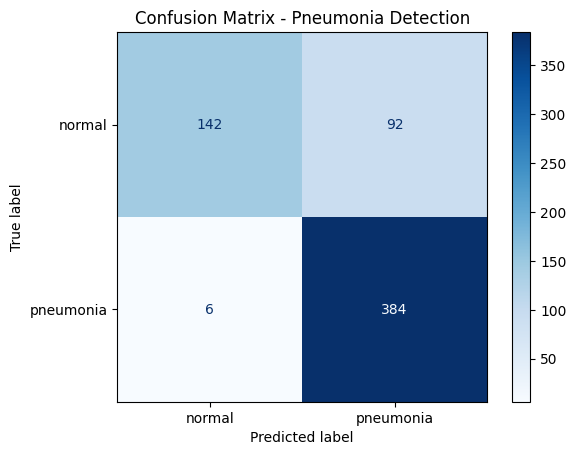

In [ ]:
# =====================
# Import Libraries
# =====================
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# =====================
# Load Test Data
# =====================
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    r"E:\Project_File_PDF\X-ray_pnemonia_detection\test",
    target_size=(254, 254),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# =====================
# Load Model
# =====================
model = load_model(r"E:\Project_File_PDF\X-ray_pnemonia_detection\medical_ai_model.keras")
print("✅ Model loaded successfully!")

# =====================
# Predict
# =====================
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)

# =====================
# Accuracy
# =====================
acc = accuracy_score(y_true, y_pred)
print(f"✅ Model Accuracy: {acc * 100:.2f}%")

# =====================
# Confusion Matrix
# =====================
cm = confusion_matrix(y_true, y_pred)
print("📊 Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Pneumonia Detection")
plt.show()
